![texto alternativo](https://drive.google.com/uc?id=1CXVh-Dy6T792nWexE0kH45AOqqFj2_wG)


<center> <h1>Maestría en Analytics</h1> </center>
<center> <h1>Modelos Avanzados para el Análisis de Datos 1</h1> </center>
<center> <h1>Exercise 12 - Sentiment Prediction </h1> </center>

**Grupo 1**
- Camilo Andrés Suarez
- Nestor Fabian Cholo
- Germán Guillermo Torres

12 July 2020

# Exercise 12

## Analyze how travelers expressed their feelings on Twitter

A sentiment analysis job about the problems of each major U.S. airline. 
Twitter data was scraped from February of 2015 and contributors were 
asked to first classify positive, negative, and neutral tweets, followed
by categorizing negative reasons (such as "late flight" or "rude service").

In [4]:
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
# from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer



%matplotlib inline
import matplotlib.pyplot as plt

# read the data and set the datetime as the index
tweets = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/Tweets.zip', index_col=0)

tweets.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,,,,,,
570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [2]:
tweets.shape

(14640, 14)

In [5]:
tweets['text']

tweet_id
570306133677760513                  @VirginAmerica What @dhepburn said.
570301130888122368    @VirginAmerica plus you've added commercials t...
570301083672813571    @VirginAmerica I didn't today... Must mean I n...
570301031407624196    @VirginAmerica it's really aggressive to blast...
570300817074462722    @VirginAmerica and it's a really big bad thing...
                                            ...                        
569587686496825344    @AmericanAir thank you we got on a different f...
569587371693355008    @AmericanAir leaving over 20 minutes Late Flig...
569587242672398336    @AmericanAir Please bring American Airlines to...
569587188687634433    @AmericanAir you have my money, you change my ...
569587140490866689    @AmericanAir we have 8 ppl so we need 2 know h...
Name: text, Length: 14640, dtype: object

### Proportion of tweets with each sentiment

In [6]:
tweets['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

### Proportion of tweets per airline


In [7]:
tweets['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

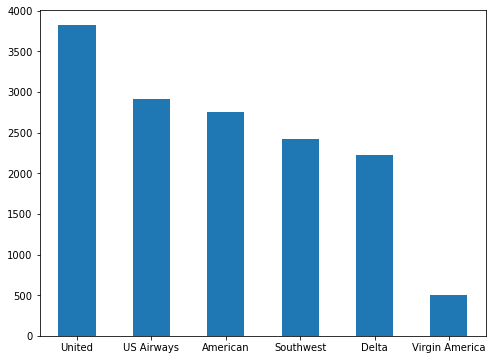

In [8]:
pd.Series(tweets["airline"]).value_counts().plot(kind = "bar",figsize=(8,6),rot = 0)

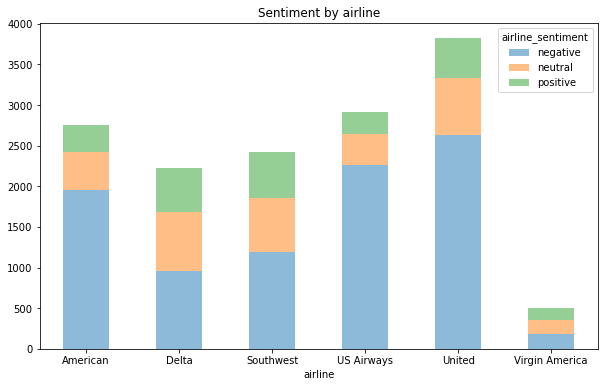

In [9]:
pd.crosstab(index = tweets["airline"],columns = tweets["airline_sentiment"]).plot(kind='bar',figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Sentiment by airline")

# Exercise 12.1 

Predict the sentiment using CountVectorizer

use Random Forest classifier

In [10]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

In [11]:
X = tweets['text']
y = tweets['airline_sentiment'].map({'negative':-1,'neutral':0,'positive':1})

In [12]:
X.iloc[4]

"@VirginAmerica and it's a really big bad thing about it"

In [13]:
y.describe()

count    14640.000000
mean        -0.465505
std          0.756084
min         -1.000000
25%         -1.000000
50%         -1.000000
75%          0.000000
max          1.000000
Name: airline_sentiment, dtype: float64

In [14]:
tweets['y']=y

In [17]:
# use CountVectorizer to create document-term matrices from X
vect = CountVectorizer()
X_dtm = vect.fit_transform(X)

In [18]:
#Crear matriz tipo Sparse
temp=X_dtm.todense()
temp

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [19]:
vect.vocabulary_

{'virginamerica': 14273,
 'what': 14551,
 'dhepburn': 4804,
 'said': 11646,
 'plus': 10438,
 'you': 14944,
 've': 14193,
 'added': 1965,
 'commercials': 4030,
 'to': 13326,
 'the': 13120,
 'experience': 5665,
 'tacky': 12925,
 'didn': 4821,
 'today': 13330,
 'must': 9234,
 'mean': 8837,
 'need': 9375,
 'take': 12941,
 'another': 2331,
 'trip': 13509,
 'it': 7685,
 'really': 11020,
 'aggressive': 2054,
 'blast': 3070,
 'obnoxious': 9726,
 'entertainment': 5455,
 'in': 7381,
 'your': 14953,
 'guests': 6733,
 'faces': 5740,
 'amp': 2263,
 'they': 13167,
 'have': 6868,
 'little': 8392,
 'recourse': 11078,
 'and': 2281,
 'big': 3007,
 'bad': 2746,
 'thing': 13176,
 'about': 1862,
 'seriously': 11914,
 'would': 14778,
 'pay': 10175,
 '30': 761,
 'flight': 6004,
 'for': 6157,
 'seats': 11832,
 'that': 13115,
 'this': 13188,
 'playing': 10403,
 'only': 9836,
 'flying': 6101,
 'va': 14145,
 'yes': 14922,
 'nearly': 9371,
 'every': 5572,
 'time': 13270,
 'fly': 6086,
 'vx': 14345,
 'ear': 5238,


In [20]:
# rows are documents, columns are terms (aka "tokens" or "features")
X_dtm.shape

(14640, 15051)

In [21]:
# Last features
print(vect.get_feature_names()[-150:])

['yayayay', 'ybmbgs0dhn', 'ybv0xaowkv', 'yc7v2s0iod', 'yccitaep3s', 'yco9dikpt9', 'yday', 'yea', 'yeah', 'year', 'yearly', 'years', 'yeehaw', 'yeg', 'yell', 'yelled', 'yelling', 'yellow', 'yeniettelswood', 'yep', 'yer', 'yes', 'yeseniahernandez', 'yessir', 'yest', 'yesterday', 'yet', 'yf9nhmwyff', 'yh1kzkyzrr', 'yhz', 'yi4wguk5tr', 'yield', 'yikes', 'yiwlhqhzgp', 'ymftw1uyhr', 'ymmh9k4cbr', 'ync2zut4zz', 'yo', 'yoga', 'yogurt', 'yokkhhqcmp', 'york', 'yorkshire2002', 'you', 'youareonyourown', 'youcandobetter', 'youcouldntmakethis', 'youd', 'youdidit', 'youknowyouwantto', 'young', 'younger', 'your', 'youragentshavenoclue', 'yourairlinesucks', 'youre', 'youredoingitwrong', 'youretheworst', 'yourlocalnyer', 'yourock', 'yourphonesystemsucks', 'yours', 'yourself', 'yourselves', 'yourstoryhere', 'yousuck', 'yout', 'youth', 'youve', 'yow', 'ypbkcirbxu', 'ypo7nyprzl', 'yponthebeat', 'ypu', 'ypvpvdltys', 'yqhk8ljabn', 'yr', 'yrs', 'ysqbvq6mgb', 'ystday', 'ystrdy', 'yuck', 'yucki', 'yul', 'yuma',

En este punto, se procesan los textos aún sin limpiar. Está creando una columna por cada palabra.

In [22]:
#lowercase: boolean, True by default
#Convert all characters to lowercase before tokenizing. Se dejan todas en minúscula
vect = CountVectorizer(lowercase=True)
X_dtm = vect.fit_transform(X)
X_dtm.shape

(14640, 15051)

In [23]:
X_dtm.todense()[0].argmax()

4804

In [24]:
vect.get_feature_names()[1983]

'admiral'

**Predecir sin n-grams y todas en minuscula (con Naive Bayes)**

In [25]:
# use Naive Bayes to predict 
nb = MultinomialNB()
pd.Series(cross_val_score(nb, X_dtm, y, cv=10)).describe()

count    10.000000
mean      0.743852
std       0.024567
min       0.714481
25%       0.727288
50%       0.743511
75%       0.748292
max       0.799180
dtype: float64

Con este modelo el Accuracy promedio de referencia es de 74.38% para las 3 clases a predecir (calculado con CV, k=10)

**Predecir sin n-grams y todas en minuscula (con Random Forest)**

In [92]:
clf = RandomForestClassifier()
clf
pd.Series(cross_val_score(clf, X_dtm, y, cv=10)).describe()

count    10.000000
mean      0.730601
std       0.027752
min       0.687842
25%       0.710895
50%       0.730191
75%       0.743169
max       0.773907
dtype: float64

En contraste, al aplicar Random Forest (con Crossvalidation k=10), obtenemos un menor Accuracy promedio del 73.06%

**Predecir sin n-grams y dejando Tokens en Minúscula (con Random Forest)**

In [26]:
vect = CountVectorizer(lowercase=True)
X_dtm2 = vect.fit_transform(X)
X_dtm2.shape

(14640, 15051)

In [27]:
clf = RandomForestClassifier()
clf
pd.Series(cross_val_score(clf, X_dtm2, y, cv=10)).describe()

count    10.000000
mean      0.733197
std       0.023128
min       0.700820
25%       0.716359
50%       0.734973
75%       0.743511
max       0.770492
dtype: float64

En este caso, al aplicar Random Forest (con Crossvalidation k=10), mejora un poco el Accuracy promedio a 73.31%, superando el obtenido con Naive Bayes.

# Exercise 12.2 

Remove stopwords, then predict the sentiment using CountVectorizer.

use Random Forest classifier

In [29]:
#Quitando Stopwords
vect = CountVectorizer(stop_words='english')
X_dtm3 = vect.fit_transform(X)
X_dtm3.shape

(14640, 14770)

In [31]:
# set of stop words
print(vect.get_stop_words())

frozenset({'beside', 'as', 'whence', 'toward', 'when', 'and', 'once', 'few', 'mostly', 'whoever', 'become', 'move', 'never', 'call', 'everywhere', 'herein', 'were', 'everyone', 'out', 'per', 'sixty', 'anyone', 'hereafter', 'somewhere', 'amoungst', 'seem', 'such', 'top', 'last', 'sometime', 'name', 'upon', 'rather', 'again', 'for', 'if', 'front', 'whereupon', 'keep', 'already', 'interest', 'elsewhere', 'they', 'ie', 'also', 'nor', 'which', 'yourself', 'ours', 'whose', 'in', 'alone', 'former', 'yourselves', 'them', 'was', 'where', 'almost', 'wherever', 'without', 'each', 'this', 'due', 'forty', 'into', 'of', 'thus', 'behind', 'through', 'those', 'much', 'most', 'am', 'might', 'would', 'back', 'now', 'be', 'least', 'on', 'ever', 'with', 'very', 'beforehand', 'under', 'three', 'himself', 'five', 'across', 'then', 'hasnt', 'than', 'co', 'either', 'fifty', 'because', 'one', 'bill', 'first', 'something', 'no', 'us', 'at', 'becoming', 'give', 'seemed', 'many', 'by', 'via', 'yet', 'latter', 'ha

In [33]:
# First features
print(vect.get_feature_names()[:50])

['00', '000', '000114', '000419', '000ft', '000lbs', '0011', '0016', '00a', '00am', '00p', '00pm', '01', '0162389030167', '0162424965446', '0162431184663', '0167560070877', '0185', '01ldxn3qqq', '01pm', '02', '0200', '03', '0316', '0372389047497', '04', '0400', '04sdytt7zd', '05', '0510', '0530', '05am', '05pm', '06', '0600', '0638', '0671', '07', '0736', '0769', '07p', '07xhcacjax', '08', '0985', '0_0', '0bjnz4eix5', '0cevy3p42b', '0ewj7oklji', '0hmmqczkcf', '0hxlnvzknp']


Realizando Predicción con RandomForest

In [30]:
clf = RandomForestClassifier()
clf
pd.Series(cross_val_score(clf, X_dtm3, y, cv=10)).describe()

count    10.000000
mean      0.715779
std       0.043832
min       0.622951
25%       0.715335
50%       0.717896
75%       0.731557
max       0.787568
dtype: float64

Observamos que al quitar stopwords, el Accuracy promedio es 71.5%, el cual disminuye con respecto al conseguido antes de quitar stopwords

# Exercise 12.3

Increase n_grams size (with and without stopwords),  then predict the sentiment using CountVectorizer

use Random Forest classifier

**Quitando StopWords**

In [35]:
vect = CountVectorizer(stop_words='english',ngram_range=(1,4))
X_dtm4 = vect.fit_transform(X)
X_dtm4.shape

(14640, 292363)

In [36]:
clf = RandomForestClassifier()
clf
pd.Series(cross_val_score(clf, X_dtm4, y, cv=10)).describe()

count    10.000000
mean      0.709426
std       0.043753
min       0.614071
25%       0.701332
50%       0.711066
75%       0.731728
max       0.782104
dtype: float64

Al usar ngrams (1,4) y quitando Stopwords, el Accuracy promedio se reduce respecto a los valores obtenidos previamente en 12.1 y 12.2

**Dejando StopWords**

In [37]:
# 1 a 4 ngrams
vect = CountVectorizer(ngram_range=(1,4))
X_dtm5 = vect.fit_transform(X)
X_dtm5.shape

(14640, 483199)

In [38]:
clf = RandomForestClassifier()
clf
pd.Series(cross_val_score(clf, X_dtm5, y, cv=10)).describe()

count    10.000000
mean      0.720082
std       0.019982
min       0.687842
25%       0.711407
50%       0.718921
75%       0.729850
max       0.750000
dtype: float64

Al dejar los stopwords, el Accuracy promedio mejora de 70.94% a 72% (hasta 4 ngrams). No obstante, en general resulta mejor sólo trabajar con palabras tokenizadas y con el modelo Naive Bayes.

In [49]:
#1 a 2 ngrams
vect = CountVectorizer(ngram_range=(1,2))
X_dtm6 = vect.fit_transform(X)
X_dtm6.shape

(14640, 117630)

In [50]:
clf = RandomForestClassifier()
clf
pd.Series(cross_val_score(clf, X_dtm6, y, cv=10)).describe()

count    10.000000
mean      0.730738
std       0.022051
min       0.707650
25%       0.712090
50%       0.727459
75%       0.740096
max       0.769126
dtype: float64

Al disminuir la cantidad ngram (1 a 2) encontramos una mejora en el Accuracy promedio, el cual sube a 73.07%

# Exercise 12.4

Predict the sentiment using TfidfVectorizer.

use Random Forest classifier

In [39]:
# TfidfVectorizer
vect = TfidfVectorizer()
pd.DataFrame(vect.fit_transform(X).toarray(), columns=vect.get_feature_names())

,00,000,000114,000419,000ft,000lbs,0011,0016,00a,00am,...,zrh_airport,zsdgzydnde,zsuztnaijq,ztrdwv0n4l,zukes,zurich,zv2pt6trk9,zv6cfpohl5,zvfmxnuelj,zzps5ywve2
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14636,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14637,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
#  TfidfVectorizer Sin Stop Words, con ngrams
tfidf_counts = TfidfVectorizer(stop_words='english',
                             ngram_range=(1,4))
tfidf_data = tfidf_counts.fit_transform(X)
tfidf_data.shape

(14640, 292363)

In [43]:
#RAndomForest Sin Stop Words, con ngrams
clf = RandomForestClassifier()
clf
pd.Series(cross_val_score(clf, tfidf_data, y, cv=10)).describe()

count    10.000000
mean      0.699590
std       0.032869
min       0.619536
25%       0.690232
50%       0.703893
75%       0.717042
max       0.740437
dtype: float64

Al emplear TfIDF, el Accuracy promedio calculado con Random Forest y CrossValidation (k=10), es el más bajo de todos los calculados en este ejercicio: 69.95%.

In [44]:
#Dejando stopwords
#  TfidfVectorizer con Stop Words, con ngrams
tfidf_counts = TfidfVectorizer(ngram_range=(1,4))
tfidf_data2 = tfidf_counts.fit_transform(X)
tfidf_data2.shape

(14640, 483199)

In [45]:
#RAndomForest sin quitar Stop Words, con ngrams
clf = RandomForestClassifier()
clf
pd.Series(cross_val_score(clf, tfidf_data2, y, cv=10)).describe()

count    10.000000
mean      0.713456
std       0.019460
min       0.683060
25%       0.699454
50%       0.715505
75%       0.724214
max       0.743169
dtype: float64

Al dejar los stopwords en los textos, el Accuracy promedio mejora un poco a 71.34%.

In [46]:
#Usando Max Features
#  TfidfVectorizer con Stop Words, con ngrams
tfidf_counts = TfidfVectorizer(ngram_range=(1,4), max_features=5000)
tfidf_data3 = tfidf_counts.fit_transform(X)
tfidf_data3.shape

(14640, 5000)

In [47]:
#RAndomForest con Stop Words, con ngrams
clf = RandomForestClassifier()
clf
pd.Series(cross_val_score(clf, tfidf_data3, y, cv=10)).describe()

count    10.000000
mean      0.729918
std       0.023922
min       0.684426
25%       0.718408
50%       0.731899
75%       0.745219
max       0.762978
dtype: float64

Tomando como aprendizaje la comparación anterior, en este caso no se quitan los stopwords, se dejan ngrams (1 a 4)  pero además se activa la el parámetro max_features. En este caso Accuracy promedio mejora a 72.99%, cual permite concluir que esta combinación es mucho más conveniente.